# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [3]:
model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=1024, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(GlobalAveragePooling2D())
model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 512)       262656    
__________

### Train

In [5]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 50

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch31.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=185,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=150,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
185/185 [==============================] - 147s 795ms/step - loss: 5.2456 - acc: 0.0068 - val_loss: 5.1958 - val_acc: 0.0105

Epoch 00001: val_loss improved from inf to 5.19577, saving model to Saved_Models/weights.best.from_scratch31.hdf5
Epoch 2/50
185/185 [==============================] - 142s 768ms/step - loss: 5.1821 - acc: 0.0103 - val_loss: 5.1767 - val_acc: 0.0130

Epoch 00002: val_loss improved from 5.19577 to 5.17675, saving model to Saved_Models/weights.best.from_scratch31.hdf5
Epoch 3/50
185/185 [==============================] - 142s 767ms/step - loss: 5.1509 - acc: 0.0115 - val_loss: 5.1446 - val_acc: 0.0111

Epoch 00003: val_loss improved from 5.17675 to 5.14460, saving model to Saved_Models/weights.best.from_scratch31.hdf5
Epoch 4/50
185/185 [==============================] - 142s 765ms/step - loss: 5.1337 - acc: 0.0150 - val_loss: 5.1352 - val_acc: 0.0158

Epoch 00004: val_loss improved from 5.14460 to 5.13519

185/185 [==============================] - 142s 768ms/step - loss: 3.6234 - acc: 0.1943 - val_loss: 4.3925 - val_acc: 0.1158

Epoch 00037: val_loss did not improve from 4.34311
Epoch 38/50
185/185 [==============================] - 142s 769ms/step - loss: 3.5289 - acc: 0.2128 - val_loss: 4.5083 - val_acc: 0.1153

Epoch 00038: val_loss did not improve from 4.34311
Epoch 39/50
185/185 [==============================] - 141s 765ms/step - loss: 3.5317 - acc: 0.2177 - val_loss: 4.4052 - val_acc: 0.1200

Epoch 00039: val_loss did not improve from 4.34311
Epoch 40/50
185/185 [==============================] - 142s 768ms/step - loss: 3.4460 - acc: 0.2272 - val_loss: 4.5288 - val_acc: 0.1221

Epoch 00040: val_loss did not improve from 4.34311
Epoch 41/50
185/185 [==============================] - 142s 768ms/step - loss: 3.4025 - acc: 0.2311 - val_loss: 4.5051 - val_acc: 0.1164

Epoch 00041: val_loss did not improve from 4.34311
Epoch 42/50
185/185 [==============================] - 142s 768ms/s

In [6]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,5.195773,0.010504,5.245384,0.006789
1,1,5.176747,0.013025,5.182728,0.010353
2,2,5.144597,0.011134,5.151302,0.011541
3,3,5.135187,0.015756,5.133418,0.015105
4,4,5.127922,0.015336,5.105827,0.016802
5,5,5.058128,0.026050,5.038744,0.025289
6,6,5.030183,0.024790,4.999993,0.024270
7,7,4.975331,0.030882,4.970664,0.028513
8,8,4.987695,0.033824,4.931353,0.028683
9,9,5.062798,0.023950,4.902690,0.032756


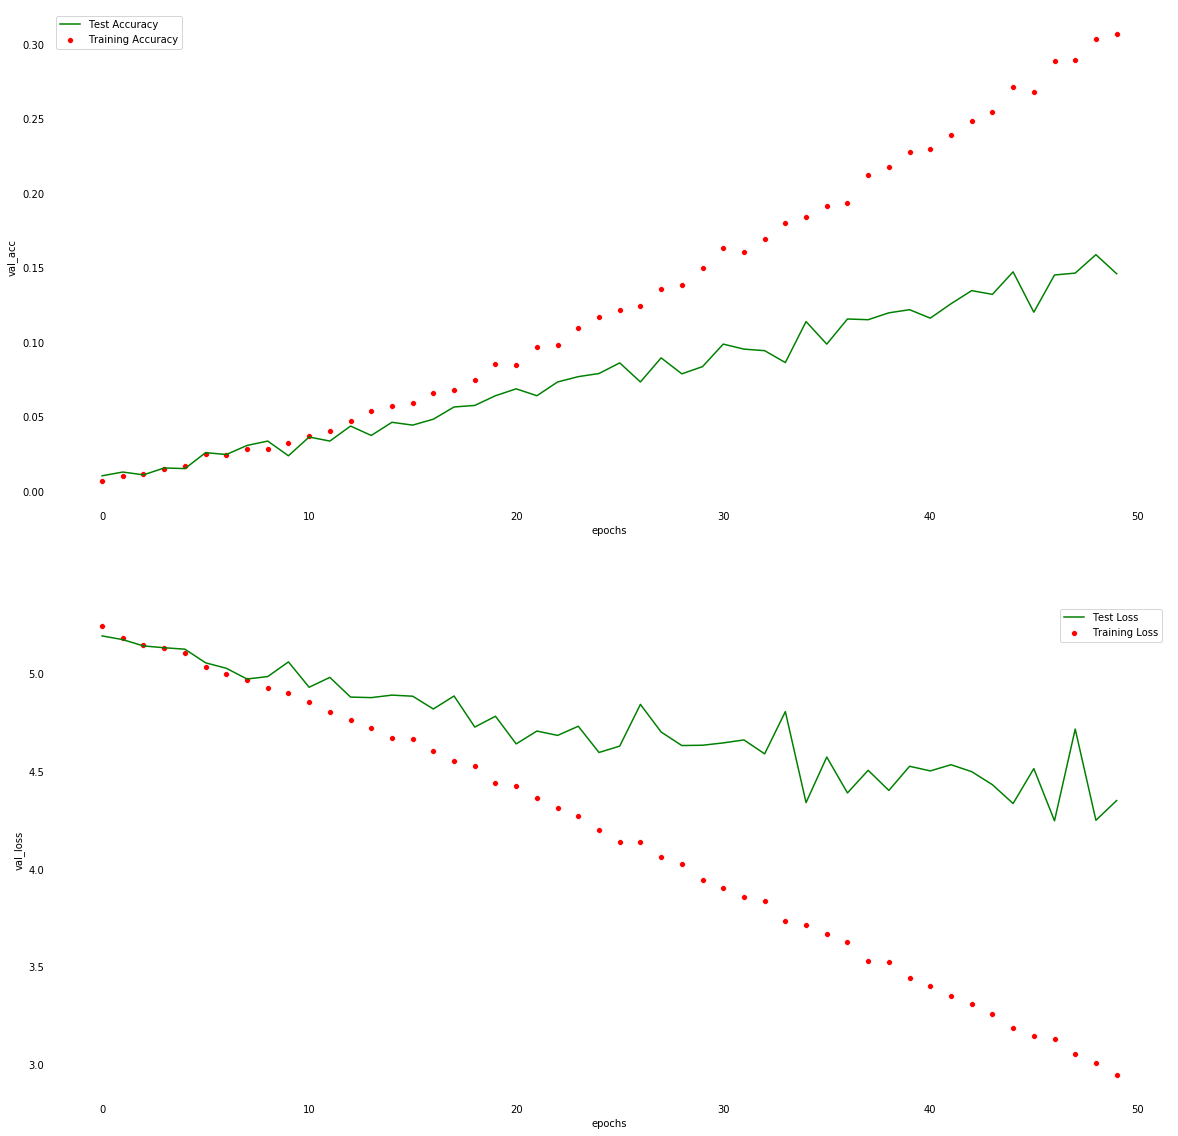

In [7]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters